# Python Intermediate - Day 1
---
This is an intermediate level of Python programming.  

If you are new to Python programming, you are suggested to start with Python Introduction.  You can download the notebooks for Python Intro by the link below.

[Python Intro](https://github.com/ngsanluk/PythonIntro-Blank)


# Using Pandas
- `pandas` is a fast, powerful, flexible and easy to use open source data analysis and manipulation add-on for Python
- `pandas` is built on top of `numpy` and therefore quite often these two are used together.

## Import `pandas`
To import `numpy` and `pandas`

* `import numpy as np` # np is the alias
* `import pandas as pd` # pd is the alias


In [1]:
import numpy as np
import pandas as pd

## Check Installed Version

To check the version of `numpy` and `pandas`, type the following commands

```
print(np.__version__)
print(pd.__version__)
```

In [2]:
print(np.__version__)

1.21.5


In [3]:
print(pd.__version__)

1.4.1


## Some Handy Features
to speed up your python coding

**Creating array**

The following statement involves too many special characters to type and therefore it will be slow to type.

```
l = ['A', 'B', 'C', 'D', 'E']
``` 

Use the `list()` function would pick a character a time and make it a independant member.
```
l = list('ABCDE') # 
```

Use split() function to separate strings with SPACES in-between
```
l = 'A B C D E'.split()
```

**Generates a range of dates**:
```
dates = pd.date_range('20210101', periods=7) 
type(dates) # returns pandas.core.indexes.datetimes.DatetimeIndex
```

In [4]:
list('ABCDE')

['A', 'B', 'C', 'D', 'E']

In [5]:
'A B C D E'.split()

['A', 'B', 'C', 'D', 'E']

In [7]:
dates = pd.date_range('20220101', periods=7)

In [8]:
dates

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07'],
              dtype='datetime64[ns]', freq='D')

In [8]:
type(dates)

pandas.core.indexes.datetimes.DatetimeIndex

## Remember `type()` function

Always use `type()` function to verify the type of a variable or the returned object from a function call.

e.g.
```
type(dates)
```

In [9]:
type(dates)

pandas.core.indexes.datetimes.DatetimeIndex

# Keyboard Shortcuts

A few keyboard shortcuts will speed up your coding in great deal.  To apply keyboard shortcuts, you must be in COMMAND mode.

When a cell is in EDIT mode, the border color is GREEN.

When a cell is in COMMAND mode, the border color is BLUE.

## Switching between COMMAND/EDIT modes
* Press `ESC` to switch to COMMAND mode (while you are in EDIT mode)
* Press `ENTER` to switch to EDIT mode (while you are in COMMAND mode)

To apply other keyboard shortcuts, make sure you are in COMMAND mode (Cell border in BLUE)

## Managing Codes

* `SHIFT + ENTER`: Run current cell and move to next cell
* `CMD + ENTER` (Mac) or `CTRL + ENTER` (Windows) to run and stay at the current cell
* `A`: insert new cell ABOVE
* `B`: insert new cell BELOW
* `D + D`: delete the current celll
* `M`: change a cell to **Markdown** type
* `Y`: change a cell to **Code** type
* `C`: Copy
* `V`: Paste
* `SHIFT + UP/DOWN`: to select multiple cells

## Spliting/Merging
* `SHIFT + CTRL + -`: split current cells into two cells from where your cursor is 
* `SHIFT + M`: Merge multiple cells

## Code Completion and Helps
* `SHIFT + TAB`: after you input a code, press this key combination to show helps
* `. + TAB`: after `.`, press `TAB` for code completion

**e.g.:**
Type `pd.read_` + `TAB`, you wil see prompts of whole functions name for reading different formats of file.

## Multiple Lines/Cursors

Press and hold `OPTION` (on Mac) or `ALT` (on Windows) to select mulple lines

Press and hold `OPTION + CMD` (on Mac) or `ALT + CTRL` (on Windows) to add more cursor

In [111]:
print("hi 1")
print("hi 2")
print("hi 3")
print("hi 4")
print("hi from Sunny")
print("hello from Sunny")

hi 1
hi 2
hi 3
hi 4
hi from Sunny
hello from Sunny


# Help

Prepend a `?` to a library name, method name or variable name, you can access the Docstring for quick reference

e.g.

```
?print
?str.upper
?pd.read_csv
?pd.read_excel
```

Or use `help()` function
```
help(print)
help(str.upper)
help(pd.read_csv)
help(pd.read_excel)
```

In [104]:
?str.upper

In [106]:
?pd.read_csv

In [105]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



# EXERCISE : Shortcuts Practicing

Picking up a few shortcuts will speed up your coding by great deal.  

You have 3 minutes to practice the above mentioned keyboard shortcut.


In [10]:
print("hello #1")

hello #1


In [ ]:
print("hello #2")

In [ ]:
print("hello #3")

print("hello #4")

In [ ]:
print("hello #3")
print("hello #4")

Type `print` and followed by pressing `SHIFT + TAB`

In [11]:
address = "Hong Kong"

Type`'address.` and followed by pressing `TAB` key
you will see a list of function that can be applied to a string type

# Markdown

## What is Markdown

Markdown is a lightweight markup language that you can use to add formatting elements to plaintext text documents.

## Basic Syntax

![Markdown Cheat Sheet](https://res.cloudinary.com/practicaldev/image/fetch/s--2rTn_7XO--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://dev-to-uploads.s3.amazonaws.com/i/5zhubbpov3m3ly9a1t9c.png)

[More Markdown Syntax](https://www.markdownguide.org/basic-syntax/)

## Markdown Playground 

The following page let you type markdown and provide live preview

[dillinger.io](https://dillinger.io/)

# EXERCISE: Markdown Practicing

# IPython Magic Commands

**A few common magic commands**

* `%pwd`: shows working directory
* `%ls`: lists the files/folders under current directory
* `%cd`: change the working directory to certain folder


**To list all the IPython magic commands, type**
```
%lsmagic
```

total 1000
-rwxr-xr-x  1 sunnyng  staff  468128 Apr 13 14:59 Day1.ipynb*
-rwxr-xr-x  1 sunnyng  staff   39200 Feb 22 16:23 Day2.ipynb*
drwxr-xr-x  7 sunnyng  staff     224 Apr 12 23:36 data/


In [129]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

# Delete a variable from kernel

Use the following command to delete variable from environment

`del varaialb_name`

e.g.:

```
greeting = "hello from Sunny"
print(greeting)
del greeting
print(greeting) # since greeting is deleted, this line will throw an error

```

# Pandas `DataFrame`
A `DataFrame` is a two dimensional data structure.

**To declare a dataframe**:
```
students = pd.DataFrame({
    "Name": ["Andy", "Ben", "Cathy", "Debra"],
    "Age": [20, 22, 23, 22],
    "Sex": ["male", "male", "female", "female"],
    "Year": [1, 3, 4, 3]
})
```

**Check the type by using `type()` function**
```
print(type(students)) # it returns pandas.core.frame.DataFrame

```
**In real situation**
- `DataFrame` are seldom declared using code above.
- Instead, data are usually imported from external files like csv, excel, json and make availble for analysis in the form of `DataFrame`

In [136]:
students = pd.DataFrame({
    "Name": ["Andy", "Ben", "Cathy", "Debra", "Eva"],
    "Age": [20, 22, 23, 22, 21],
    "Sex": ["male", "male", "female", "female", "female"],
    "Year": [1, 3, 4, 3, 2]
})

In [137]:
students

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3
2,Cathy,23,female,4
3,Debra,22,female,3
4,Eva,21,female,2


In [138]:
print(type(students))

<class 'pandas.core.frame.DataFrame'>


# `DataFrame` Information

* `df.shape` #returns the dimension of data-frame in the form of tuple
* `df.shape[0]` #retrieves the first elememnt of the returned tuple.  it represents the number of row
* `df.info()` #returns the detailed information for a data-frame
* `df.describe()` #shows the basic statistical summary such as min, max, average of a column (only for numeric columns)


In [139]:
students.shape

(5, 4)

In [140]:
students.shape[0]

5

In [141]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   Sex     5 non-null      object
 3   Year    5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes


In [142]:
students.describe()

,Age,Year
count,5.000000,5.000000
mean,21.600000,2.600000
std,1.140175,1.140175
min,20.000000,1.000000
25%,21.000000,2.000000
50%,22.000000,3.000000
75%,22.000000,3.000000
max,23.000000,4.000000


## Converting pandas dataframe to numpy array

Many functions only accept numpy array or python dictionary as arguments.  In these cases, type conversion is required.

To convert dataframe to numpy array
```
students.to_numpy()
students.values
```

To convert dataframe to Python dictionary
```
students.to_dict()
```

In [179]:
students.to_numpy()

array([['Andy', 20, 'male', 1],
       ['Ben', 22, 'male', 3],
       ['Cathy', 23, 'female', 4],
       ['Debra', 22, 'female', 3],
       ['Eva', 21, 'female', 2]], dtype=object)

In [180]:
students.values

array([['Andy', 20, 'male', 1],
       ['Ben', 22, 'male', 3],
       ['Cathy', 23, 'female', 4],
       ['Debra', 22, 'female', 3],
       ['Eva', 21, 'female', 2]], dtype=object)

In [181]:
students.to_dict()

{'Name': {0: 'Andy', 1: 'Ben', 2: 'Cathy', 3: 'Debra', 4: 'Eva'},
 'Age': {0: 20, 1: 22, 2: 23, 3: 22, 4: 21},
 'Sex': {0: 'male', 1: 'male', 2: 'female', 3: 'female', 4: 'female'},
 'Year': {0: 1, 1: 3, 2: 4, 3: 3, 4: 2}}

# Retrieving Column(s)

## Retrieving a Column 

Specify a **column name** (in string) to indicate which column you want to retrieve

**Example**
```
students['Name']
name = students['Name']
print(type(name)) # returns pandas.core.series.Series
```

A Pandas Series is like a column in a table.

It is a one-dimensional array holding data of any type.

In [229]:
students['Name']
names = students['Name']
names

0     Andy
1      Ben
2    Cathy
3    Debra
4      Eva
Name: Name, dtype: object

In [25]:
print(type(names)) # returns pandas.core.series.Series

<class 'pandas.core.series.Series'>


## Retrieving Multiple Columns
Use `[]` (square bracket) with a column names (in string) to indicate which columns you want to retrieve

**Example**

* `columns = ['Name', 'Year']` #declare the columns you want in a list
* `print(students[columns])` #pass the column list as paramenter to the dataframe
* `print(type(students[columns]))` #Returns pandas.core.frame.DataFrame

A quick hand to write the above code is using **double** square brackets
```
name_and_year = df[['Name', 'Year']] # doubled square bracket are used here
print(type(name_and_year)) # Returns pandas.core.frame.DataFrame
```
**Below is a mistake**
```
name_and_year = df['Name', 'Year'] # this is a mistake
```

In [230]:
columns = ['Name', 'Year'] #declare the columns you want in a list
print(students[columns]) #pass the column list as paramenter to the dataframe
print(type(students[columns])) #Returns pandas.core.frame.DataFrame

    Name  Year
0   Andy     1
1    Ben     3
2  Cathy     4
3  Debra     3
4    Eva     2
<class 'pandas.core.frame.DataFrame'>


In [231]:
students[['Name', 'Year']] 
name_and_year = students[['Name', 'Year']]
print(name_and_year)

    Name  Year
0   Andy     1
1    Ben     3
2  Cathy     4
3  Debra     3
4    Eva     2


In [28]:
print(type(name_and_year))

<class 'pandas.core.frame.DataFrame'>


# Selecting Row(s)

## Use `loc[]` to Locate Row
Pandas use the `loc` attribute to return one or more specified row(s)

Example:
```
students.loc[0]
students.loc[1]
type(students.loc[0]) # returns pandas.core.series.Series
```

In [232]:
students.loc[0]

Name    Andy
Age       20
Sex     male
Year       1
Name: 0, dtype: object

In [233]:
students.loc[1]

Name     Ben
Age       22
Sex     male
Year       3
Name: 1, dtype: object

In [234]:
type(students.loc[0]) # returns pandas.core.series.Series

pandas.core.series.Series

## Alternative to Locate Multiple Rows
Provide a list of row number: `[0, 2]`

**Example**:
```
rows = [0, 2] # defines a list of row number separated by comma
students.loc[rows] # use the defined row numbers as parameter for loc[]
```

**Or simplified one liner**:
```
students.loc[[0, 2]]
type(students.loc[[0, 2]])
```

**Below is a mistake**
```
students.loc[0, 2] # have to use double pairs of squar brackets
```


In [235]:
students.loc[[0, 2]]

,Name,Age,Sex,Year
0,Andy,20,male,1
2,Cathy,23,female,4


In [236]:
type(students.loc[[0, 2]])

pandas.core.frame.DataFrame

## Retrieving Rows with Range
- Provide the starting row number and ending row number
- Use `:` to separate the starting row number and ending row number

Example:

* `students.loc[0:2]`  # selecting from position 0 to 2 (inclusive)
* `students.loc[:2]` # omitting the starting index. selecting from position 0 to 2 
* `students.loc[2:]` # omitting the ending index. selecting from position 2 all the way to the end

Short hand:
(Works a bit different. It's exclusive. The end index is NOT included in the result)

* `students[0:2]`
* `students[:2]` # from position 0 to 1. End position (row 2) exclusive.
* `students[2:]` # from position 2 to the end



In [238]:
students[0:2]
students[:2] # from position 0 to 1. End position (row 2) exclusive.
students[2:] # from position 2 to the end

,Name,Age,Sex,Year
2,Cathy,23,female,4
3,Debra,22,female,3
4,Eva,21,female,2


In [239]:
students[0:2]

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3


In [240]:
type(students[0:2])

pandas.core.frame.DataFrame

In [241]:
students.loc[:2]

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3
2,Cathy,23,female,4


In [242]:
students[:2]

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3


In [243]:
students.loc[2:]

,Name,Age,Sex,Year
2,Cathy,23,female,4
3,Debra,22,female,3
4,Eva,21,female,2


In [244]:
students[2:]

,Name,Age,Sex,Year
2,Cathy,23,female,4
3,Debra,22,female,3
4,Eva,21,female,2


# Filtering Rows
- It scans through each row
- Perform a logical operation on a column of each row 
- It returns `True` or `False` as result for the comparison operation on that row

Example:

* `filter = students['Age']<23` # this returns a Series of True/False
* `print(filter)`
* `type(filter)` # It a Series of True/False
* `students[filter]` # use the filter as parameters. A True means that row will stay.  A False means that row will be kicked out.


Or in one-liner manner
```
students[students['Age']<23]
```


In [245]:
filter = students['Age']<23

In [40]:
print(filter)

0     True
1     True
2    False
3     True
4     True
Name: Age, dtype: bool


In [41]:
type(filter)

pandas.core.series.Series

In [246]:
students[filter]

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3
3,Debra,22,female,3
4,Eva,21,female,2


In [247]:
students[students['Age']<23]

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3
3,Debra,22,female,3
4,Eva,21,female,2


## Filtering Rows with Multiple Conditions
Example:

* `filter = students['Age']<23`
* `filter2 = students['Year']==3`
* `df[filter & filter2]` # &: AND logical operator
* `df[filter | filter2]` # |: OR logical operator


Or one-liner

* `students[(students['Age']<23) & (students['Year']==3)]` # make sure you include the a pair of () for each logical operation
* `students[(students['Age']<23) | (students['Year']==3)]` # make sure you include the a pair of () for each logical operation


In [248]:
filter = students['Age']<23
filter2 = students['Year']==3
students[filter & filter2] # &: AND logical operator
students[filter | filter2] # |: OR logical operator

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3
3,Debra,22,female,3
4,Eva,21,female,2


In [249]:
filter2 = students['Year']==3
filter2

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

In [250]:
students[filter & filter2]

,Name,Age,Sex,Year
1,Ben,22,male,3
3,Debra,22,female,3


In [251]:
students[filter | filter2]

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3
3,Debra,22,female,3
4,Eva,21,female,2


In [252]:
students[(students['Age']<23) & (students['Year']==3)]

,Name,Age,Sex,Year
1,Ben,22,male,3
3,Debra,22,female,3


In [253]:
students[(students['Age']<23) | (students['Year']==3)]

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3
3,Debra,22,female,3
4,Eva,21,female,2


## `concat()` Function

You can use `concat()` function to merge multiple Series to form a data-frame

```
pd.concat([filter, filter2, (filter & filter2)], axis=1)
pd.concat([filter, filter2, (filter | filter2)], axis=1)

```

In [254]:
print(type(filter))
print(type(filter2))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [255]:
pd.concat([filter, filter2, (filter & filter2)], axis=1)

,Age,Year,0
0,True,False,False
1,True,True,True
2,False,False,False
3,True,True,True
4,True,False,False


In [256]:
type(pd.concat([filter, filter2, (filter & filter2)], axis=1))

pandas.core.frame.DataFrame

In [257]:
pd.concat([filter, filter2, (filter | filter2)], axis=1)

,Age,Year,0
0,True,False,True
1,True,True,True
2,False,False,False
3,True,True,True
4,True,False,True


## Restricting Rows and Columns
You can apply both **row filtering** and **columns retricting** at the same time

Example:

* `students[students['Year']==3]` # row filtering only
* `students[students['Year']==3][['Name', 'Year']]` # row filtering and followed by column restricting.  The code can easily become difficult to read


In [258]:
students[students['Year']==3]

,Name,Age,Sex,Year
1,Ben,22,male,3
3,Debra,22,female,3


In [259]:
students[students['Year']==3][['Name', 'Year']]

,Name,Year
1,Ben,3
3,Debra,3


## Creating Subset


In [262]:
students

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3
2,Cathy,23,female,4
3,Debra,22,female,3
4,Eva,21,female,2


In [263]:
# Creating a subset
df_subset = students.loc[:, ['Name', 'Sex', 'Year']]

In [264]:
df_subset

,Name,Sex,Year
0,Andy,male,1
1,Ben,male,3
2,Cathy,female,4
3,Debra,female,3
4,Eva,female,2


# EXERCISE: Row/Column Selecting

You have 1o minutes to practice the rows and column Selecting statements

Load the graduates.csv file as df
```
df = pd.read_csv('./data/graduates.csv')
df.head()
```

In [268]:
df = pd.read_csv('./data/graduates.csv')
df.head()

,AcademicYear,LevelOfStudy,ProgrammeCategory,Sex,Headcount
0,2009/10,Sub-degree,Arts and Humanities,M,158
1,2009/10,Sub-degree,Arts and Humanities,F,475
2,2009/10,Sub-degree,Business and Management,M,73
3,2009/10,Sub-degree,Business and Management,F,227
4,2009/10,Sub-degree,Education,M,122


### Task 1
**Select all the rows that LevelOfStudy is  'Undergraduate'**

Hints: use `==` to check if the value of `LevelOfStudy` is equivalent to 'Undergraduate'

In [269]:
df[df['LevelOfStudy']=='Undergraduate']

,AcademicYear,LevelOfStudy,ProgrammeCategory,Sex,Headcount
14,2009/10,Undergraduate,Arts and Humanities,M,659
15,2009/10,Undergraduate,Arts and Humanities,F,1788
16,2009/10,Undergraduate,Business and Management,M,1861
17,2009/10,Undergraduate,Business and Management,F,2314
18,2009/10,Undergraduate,Education,M,148
...,...,...,...,...,...
620,2020/21,Undergraduate,"Medicine, Dentistry and Health",F,1217
621,2020/21,Undergraduate,Sciences,M,2251
622,2020/21,Undergraduate,Sciences,F,1379
623,2020/21,Undergraduate,Social Sciences,M,1314


### Task 2
**Select all the rows that `LevelOfStudy` is  'Undergraduate' and `ProgrammeCategory` is 'Business and Management'**

Hints: 
* Use `&` to put together mutilple logical expression
* Use `()` to wrap each logical expression

In [270]:
df[(df['LevelOfStudy']=='Undergraduate') & (df['ProgrammeCategory']=='Business and Management')]

,AcademicYear,LevelOfStudy,ProgrammeCategory,Sex,Headcount
16,2009/10,Undergraduate,Business and Management,M,1861
17,2009/10,Undergraduate,Business and Management,F,2314
72,2010/11,Undergraduate,Business and Management,M,1900
73,2010/11,Undergraduate,Business and Management,F,2417
128,2011/12,Undergraduate,Business and Management,M,1815
129,2011/12,Undergraduate,Business and Management,F,2332
184,2012/13,Undergraduate,Business and Management,M,1826
185,2012/13,Undergraduate,Business and Management,F,2315
240,2013/14,Undergraduate,Business and Management,M,1881
241,2013/14,Undergraduate,Business and Management,F,2374


### Task 3
**Select all the rows that `LevelOfStudy` is  'Undergraduate' and `ProgrammeCategory` is 'Business and Management' and for rows of 'male' only**

Hints: 
* Use `&` to put together mutilple logical expression
* Use `()` to wrap each logical expression

In [271]:
df[(df['LevelOfStudy']=='Undergraduate') & (df['ProgrammeCategory']=='Business and Management') & (df['Sex']=='M')]

,AcademicYear,LevelOfStudy,ProgrammeCategory,Sex,Headcount
16,2009/10,Undergraduate,Business and Management,M,1861
72,2010/11,Undergraduate,Business and Management,M,1900
128,2011/12,Undergraduate,Business and Management,M,1815
184,2012/13,Undergraduate,Business and Management,M,1826
240,2013/14,Undergraduate,Business and Management,M,1881
296,2014/15,Undergraduate,Business and Management,M,1927
349,2015/16,Undergraduate,Business and Management,M,1881
403,2016/17,Undergraduate,Business and Management,M,1892
457,2017/18,Undergraduate,Business and Management,M,1944
511,2018/19,Undergraduate,Business and Management,M,1826


### Task 4
**Select all the rows that `LevelOfStudy` is  'Undergraduate' and `ProgrammeCategory` is 'Business and Management' and for rows of 'male' only**.  
**Show only the 'AcademicYear' and 'Headcount'

Hints: 
* Use `&` to put together mutilple logical expression
* Use `()` to wrap each logical expression

In [273]:
df[(df['LevelOfStudy']=='Undergraduate') & (df['ProgrammeCategory']=='Business and Management') & (df['Sex']=='M')][['AcademicYear', "Headcount"]]

,AcademicYear,Headcount
16,2009/10,1861
72,2010/11,1900
128,2011/12,1815
184,2012/13,1826
240,2013/14,1881
296,2014/15,1927
349,2015/16,1881
403,2016/17,1892
457,2017/18,1944
511,2018/19,1826


# Reading External Data Source
Code example:
```
allowance_df = pd.read_csv('./data/allowance.csv') # the dot './' mean current path path
allowance_df.head() # return the first 5 rows
allowance_df.tail() # return the last 5 rows
allowance_df.head(8)
allowance_df.tail(8)
allowance_df.info() # the table meta data
allowance_df.describe() # basic statistic information
```
**Handling Empty Values**:
- The `info()` method also tells us how many Non-Null values there are present in each column
- Empty values, or Null values, can be bad when analyzing data, and you should consider removing rows with empty values or replace the empty value with an average value of the column
- This process is a called data tidying.

In [122]:
allowance_df = pd.read_csv('./data/allowance.csv')

In [123]:
allowance_df.head()

,Assessment_Year,Basic,Married_Person,Child,Child_newborn,Dependent_Brother_Sister,Dependent_Parent_60,Dependent_Parent_55,Additional_Dependent_Parent_60,Additional_Dependent_Parent_55,Personal_Disability_Allowance,Single_Parent,Disabled_Dependant
0,2019/20,132000,264000,120000,120000,37500,50000,25000,50000,25000,75000.0,132000,75000
1,2018/19,132000,264000,120000,120000,37500,50000,25000,50000,25000,75000.0,132000,75000
2,2017/18,132000,264000,100000,100000,37500,46000,23000,46000,23000,NaN,132000,75000
3,2016/17,132000,264000,100000,100000,33000,46000,23000,46000,23000,NaN,132000,66000
4,2015/16,120000,240000,100000,100000,33000,40000,20000,40000,20000,NaN,120000,66000


In [124]:
allowance_df.tail()

,Assessment_Year,Basic,Married_Person,Child,Child_newborn,Dependent_Brother_Sister,Dependent_Parent_60,Dependent_Parent_55,Additional_Dependent_Parent_60,Additional_Dependent_Parent_55,Personal_Disability_Allowance,Single_Parent,Disabled_Dependant
6,2013/14,120000,240000,70000,70000,33000,38000,19000,38000,19000,NaN,120000,66000
7,2012/13,120000,240000,63000,63000,33000,38000,19000,38000,19000,NaN,120000,66000
8,2011/12,108000,216000,60000,60000,30000,36000,18000,36000,18000,NaN,108000,60000
9,2010/11,108000,216000,50000,50000,30000,30000,15000,30000,15000,NaN,108000,60000
10,2009/10,108000,216000,50000,50000,30000,30000,15000,30000,15000,NaN,108000,60000


In [125]:
allowance_df.head(8)

,Assessment_Year,Basic,Married_Person,Child,Child_newborn,Dependent_Brother_Sister,Dependent_Parent_60,Dependent_Parent_55,Additional_Dependent_Parent_60,Additional_Dependent_Parent_55,Personal_Disability_Allowance,Single_Parent,Disabled_Dependant
0,2019/20,132000,264000,120000,120000,37500,50000,25000,50000,25000,75000.0,132000,75000
1,2018/19,132000,264000,120000,120000,37500,50000,25000,50000,25000,75000.0,132000,75000
2,2017/18,132000,264000,100000,100000,37500,46000,23000,46000,23000,NaN,132000,75000
3,2016/17,132000,264000,100000,100000,33000,46000,23000,46000,23000,NaN,132000,66000
4,2015/16,120000,240000,100000,100000,33000,40000,20000,40000,20000,NaN,120000,66000
5,2014/15,120000,240000,70000,70000,33000,40000,20000,40000,20000,NaN,120000,66000
6,2013/14,120000,240000,70000,70000,33000,38000,19000,38000,19000,NaN,120000,66000
7,2012/13,120000,240000,63000,63000,33000,38000,19000,38000,19000,NaN,120000,66000


In [126]:
allowance_df.info() # the table meta data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Assessment_Year                 11 non-null     object 
 1   Basic                           11 non-null     int64  
 2   Married_Person                  11 non-null     int64  
 3   Child                           11 non-null     int64  
 4   Child_newborn                   11 non-null     int64  
 5   Dependent_Brother_Sister        11 non-null     int64  
 6   Dependent_Parent_60             11 non-null     int64  
 7   Dependent_Parent_55             11 non-null     int64  
 8   Additional_Dependent_Parent_60  11 non-null     int64  
 9   Additional_Dependent_Parent_55  11 non-null     int64  
 10  Personal_Disability_Allowance   2 non-null      float64
 11  Single_Parent                   11 non-null     int64  
 12  Disabled_Dependant              11 non

In [127]:
allowance_df.describe() # basic statistic information

,Basic,Married_Person,Child,Child_newborn,Dependent_Brother_Sister,Dependent_Parent_60,Dependent_Parent_55,Additional_Dependent_Parent_60,Additional_Dependent_Parent_55,Personal_Disability_Allowance,Single_Parent,Disabled_Dependant
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,2.0,11.000000,11.000000
mean,121090.909091,242181.818182,82090.909091,82090.909091,33409.090909,40363.636364,20181.818182,40363.636364,20181.818182,75000.0,121090.909091,66818.181818
std,9974.512975,19949.025950,26534.711400,26534.711400,2931.025263,7032.392584,3516.196292,7032.392584,3516.196292,0.0,9974.512975,5862.050526
min,108000.000000,216000.000000,50000.000000,50000.000000,30000.000000,30000.000000,15000.000000,30000.000000,15000.000000,75000.0,108000.000000,60000.000000
25%,114000.000000,228000.000000,61500.000000,61500.000000,31500.000000,37000.000000,18500.000000,37000.000000,18500.000000,75000.0,114000.000000,63000.000000
50%,120000.000000,240000.000000,70000.000000,70000.000000,33000.000000,40000.000000,20000.000000,40000.000000,20000.000000,75000.0,120000.000000,66000.000000
75%,132000.000000,264000.000000,100000.000000,100000.000000,35250.000000,46000.000000,23000.000000,46000.000000,23000.000000,75000.0,132000.000000,70500.000000
max,132000.000000,264000.000000,120000.000000,120000.000000,37500.000000,50000.000000,25000.000000,50000.000000,25000.000000,75000.0,132000.000000,75000.000000


# Tidying Data
Fixing bad data in your data set.

**Bad data could be**:
- Empty cells
- Data in wrong format
- Wrong data
- Duplicates

## Rename Columns

Call `rename()` function with dictionay object

Example:
```
students.rename(columns={'Name': 'StudentName', 'Sex': 'Gender'})
```

In [143]:
students

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3
2,Cathy,23,female,4
3,Debra,22,female,3
4,Eva,21,female,2


In [145]:
students.rename(columns={'Name': 'StudentName', 'Sex': 'Gender'})

,StudentName,Age,Gender,Year
0,Andy,20,male,1
1,Ben,22,male,3
2,Cathy,23,female,4
3,Debra,22,female,3
4,Eva,21,female,2


## Delete Columns

Call `drop()` function to delete the columns that your don't want

Example:
```
students.drop(columns=['Age', 'Year'])
```

In [146]:
students.drop(columns=['Age', 'Year'])

,Name,Sex
0,Andy,male
1,Ben,male
2,Cathy,female
3,Debra,female
4,Eva,female


## Replacing the existing data-frame variable

We usually tend to replace the old dataframe variable with the processed data frame and therefore the code will go like

```
students = students.rename(columns={'Name': 'StudentName', 'Sex': 'Gender'})
students = students.drop(columns=['Age', 'Year'])

```

## Drop Rows with Empty Values
```
cleaned_df = df.dropna() # 9 rows with null value will be dropped
print(df.shape[0])
print(cleaned_df.shape[0])
cleaned_df
cleaned_df.info()
cleaned_df.describe()
```

In [147]:
allowance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Assessment_Year                 11 non-null     object 
 1   Basic                           11 non-null     int64  
 2   Married_Person                  11 non-null     int64  
 3   Child                           11 non-null     int64  
 4   Child_newborn                   11 non-null     int64  
 5   Dependent_Brother_Sister        11 non-null     int64  
 6   Dependent_Parent_60             11 non-null     int64  
 7   Dependent_Parent_55             11 non-null     int64  
 8   Additional_Dependent_Parent_60  11 non-null     int64  
 9   Additional_Dependent_Parent_55  11 non-null     int64  
 10  Personal_Disability_Allowance   2 non-null      float64
 11  Single_Parent                   11 non-null     int64  
 12  Disabled_Dependant              11 non

In [178]:
cleaned_allowance_df = allowance_df.dropna()

In [149]:
print(cleaned_allowance_df.shape[0])

2


In [151]:
cleaned_allowance_df

,Assessment_Year,Basic,Married_Person,Child,Child_newborn,Dependent_Brother_Sister,Dependent_Parent_60,Dependent_Parent_55,Additional_Dependent_Parent_60,Additional_Dependent_Parent_55,Personal_Disability_Allowance,Single_Parent,Disabled_Dependant
0,2019/20,132000,264000,120000,120000,37500,50000,25000,50000,25000,75000.0,132000,75000
1,2018/19,132000,264000,120000,120000,37500,50000,25000,50000,25000,75000.0,132000,75000


In [152]:
cleaned_allowance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Assessment_Year                 2 non-null      object 
 1   Basic                           2 non-null      int64  
 2   Married_Person                  2 non-null      int64  
 3   Child                           2 non-null      int64  
 4   Child_newborn                   2 non-null      int64  
 5   Dependent_Brother_Sister        2 non-null      int64  
 6   Dependent_Parent_60             2 non-null      int64  
 7   Dependent_Parent_55             2 non-null      int64  
 8   Additional_Dependent_Parent_60  2 non-null      int64  
 9   Additional_Dependent_Parent_55  2 non-null      int64  
 10  Personal_Disability_Allowance   2 non-null      float64
 11  Single_Parent                   2 non-null      int64  
 12  Disabled_Dependant              2 non-nu

In [153]:
cleaned_allowance_df.describe()

,Basic,Married_Person,Child,Child_newborn,Dependent_Brother_Sister,Dependent_Parent_60,Dependent_Parent_55,Additional_Dependent_Parent_60,Additional_Dependent_Parent_55,Personal_Disability_Allowance,Single_Parent,Disabled_Dependant
count,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
mean,132000.0,264000.0,120000.0,120000.0,37500.0,50000.0,25000.0,50000.0,25000.0,75000.0,132000.0,75000.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,132000.0,264000.0,120000.0,120000.0,37500.0,50000.0,25000.0,50000.0,25000.0,75000.0,132000.0,75000.0
25%,132000.0,264000.0,120000.0,120000.0,37500.0,50000.0,25000.0,50000.0,25000.0,75000.0,132000.0,75000.0
50%,132000.0,264000.0,120000.0,120000.0,37500.0,50000.0,25000.0,50000.0,25000.0,75000.0,132000.0,75000.0
75%,132000.0,264000.0,120000.0,120000.0,37500.0,50000.0,25000.0,50000.0,25000.0,75000.0,132000.0,75000.0
max,132000.0,264000.0,120000.0,120000.0,37500.0,50000.0,25000.0,50000.0,25000.0,75000.0,132000.0,75000.0


## Replacing empty cells with mean or median

Call `fillna()` function to fill in the missing values

```
allowance_df["Personal_Disability_Allowance"].describe()
x = allowance_df["Personal_Disability_Allowance"].mean()
allowance_df["Personal_Disability_Allowance"].fillna(x, inplace = True)
allowance_df["Personal_Disability_Allowance"].describe()
```


In [156]:
allowance_df["Personal_Disability_Allowance"].describe()

count        2.0
mean     75000.0
std          0.0
min      75000.0
25%      75000.0
50%      75000.0
75%      75000.0
max      75000.0
Name: Personal_Disability_Allowance, dtype: float64

In [157]:
x = allowance_df["Personal_Disability_Allowance"].mean()
x

75000.0

In [158]:
allowance_df["Personal_Disability_Allowance"].fillna(x, inplace = True)

In [159]:
allowance_df["Personal_Disability_Allowance"].describe().describe()

count        8.000000
mean     56251.375000
std      34715.707861
min          0.000000
25%      56252.750000
50%      75000.000000
75%      75000.000000
max      75000.000000
Name: Personal_Disability_Allowance, dtype: float64

In [160]:
allowance_df

,Assessment_Year,Basic,Married_Person,Child,Child_newborn,Dependent_Brother_Sister,Dependent_Parent_60,Dependent_Parent_55,Additional_Dependent_Parent_60,Additional_Dependent_Parent_55,Personal_Disability_Allowance,Single_Parent,Disabled_Dependant
0,2019/20,132000,264000,120000,120000,37500,50000,25000,50000,25000,75000.0,132000,75000
1,2018/19,132000,264000,120000,120000,37500,50000,25000,50000,25000,75000.0,132000,75000
2,2017/18,132000,264000,100000,100000,37500,46000,23000,46000,23000,75000.0,132000,75000
3,2016/17,132000,264000,100000,100000,33000,46000,23000,46000,23000,75000.0,132000,66000
4,2015/16,120000,240000,100000,100000,33000,40000,20000,40000,20000,75000.0,120000,66000
5,2014/15,120000,240000,70000,70000,33000,40000,20000,40000,20000,75000.0,120000,66000
6,2013/14,120000,240000,70000,70000,33000,38000,19000,38000,19000,75000.0,120000,66000
7,2012/13,120000,240000,63000,63000,33000,38000,19000,38000,19000,75000.0,120000,66000
8,2011/12,108000,216000,60000,60000,30000,36000,18000,36000,18000,75000.0,108000,60000
9,2010/11,108000,216000,50000,50000,30000,30000,15000,30000,15000,75000.0,108000,60000


# Aggregation Functions

aggregation functions provide summary information about a column.

```
allowance_df = pd.read_csv('./data/allowance.csv')
allowance_df.info()
allowance_df['Basic'].max() # returns the maximum value for the column
allowance_df['Basic'].min() # returns the minimum value for the column
allowance_df['Basic'].median() # returns the median for the column
allowance_df['Basic'].mean() # returns the mean value for the column
allowance_df['Basic'].std() # returns the standard deviation for the column
allowance_df['Basic'].sum() # returns the standard deviation for the column
````

In [161]:
allowance_df = pd.read_csv('./data/allowance.csv')

In [162]:
allowance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Assessment_Year                 11 non-null     object 
 1   Basic                           11 non-null     int64  
 2   Married_Person                  11 non-null     int64  
 3   Child                           11 non-null     int64  
 4   Child_newborn                   11 non-null     int64  
 5   Dependent_Brother_Sister        11 non-null     int64  
 6   Dependent_Parent_60             11 non-null     int64  
 7   Dependent_Parent_55             11 non-null     int64  
 8   Additional_Dependent_Parent_60  11 non-null     int64  
 9   Additional_Dependent_Parent_55  11 non-null     int64  
 10  Personal_Disability_Allowance   2 non-null      float64
 11  Single_Parent                   11 non-null     int64  
 12  Disabled_Dependant              11 non

In [174]:
allowance_df['Basic'].sum() # returns the standard deviation for the column

1332000

# Finding Columns' Relationship
The `corr()` method calculates the relationship between each column in your data set.
```
df.corr()
```
The Result of the `corr()` method is a table with a lot of numbers that represents how well the relationship is between two columns.
- The number varies from `-1` to `1`.
- `1` means that there is a 1 to 1 relationship (a perfect correlation).
- `0.7` or above is also a good relationship, and if you increase one value, the other will probably increase as well.
- `-0.7` or below would be just as good relationship as 0.7, but if you increase one value, the other will go down.
- `0.2` means NOT a good relationship, meaning that if one value goes up does not mean that the other will.

Example:
```
students2 = pd.read_excel('./data/Students.xlsx', sheet_name=0)
students2
students2.corr()
```

In [172]:
students2 = pd.read_excel('./data/Students.xlsx', sheet_name=0)
students2

,AcademicYear,AssociateDegree,HigherDiploma,Subdegree,FirstYearFirstDegree,TopUpDegree,Undergraduate
0,2007/08,12029,9882,21911,2468,1731,4199
1,2008/09,11238,9405,20643,3004,2095,5099
2,2009/10,14177,10186,24363,2782,2680,5462
3,2010/11,17646,10715,28361,3193,3334,6527
4,2011/12,16018,9331,25349,3640,4081,7721
5,2012/13,18131,13486,31617,6796,6082,12878
6,2013/14,11715,9751,21466,6128,7349,13477
7,2014/15,10275,9483,19758,7194,10488,17682
8,2015/16,10942,8713,19655,6701,8736,15437
9,2016/17,11127,7884,19011,6153,7635,13788


In [173]:
students2.corr()

,AssociateDegree,HigherDiploma,Subdegree,FirstYearFirstDegree,TopUpDegree,Undergraduate
AssociateDegree,1.000000,0.728727,0.956570,-0.315338,-0.460673,-0.410802
HigherDiploma,0.728727,1.000000,0.896701,-0.189895,-0.405373,-0.327808
Subdegree,0.956570,0.896701,1.000000,-0.284658,-0.470321,-0.405070
FirstYearFirstDegree,-0.315338,-0.189895,-0.284658,1.000000,0.945621,0.978879
TopUpDegree,-0.460673,-0.405373,-0.470321,0.945621,1.000000,0.992147
Undergraduate,-0.410802,-0.327808,-0.405070,0.978879,0.992147,1.000000


# Groupby and  Groups' Aggregations

## Groupby: divide data into groups

**`unique()` function**
```
df = pd.read_csv('./data/graduates.csv')
df.info()
df["LevelOfStudy"].unique() # Display unique values of a column
df["ProgrammeCategory"].unique()
```

**`groupby() function`**
```
df.groupby('LevelOfStudy')
df.groupby('ProgrammeCategory')
group_by_level = df.groupby('LevelOfStudy') # save the grouping as a variable
group_by_category = df.groupby('ProgrammeCategory') # save the grouping as a variable
group_by_level.groups # Display groups and rows belongs to that groups
```

**Those integer numbers in the list are the row number.**
```
group_by_level.first() # gives you a preview of the first few groups
group_by_level.last() # gives you a previous of the last few groups
group_by_level.size() # return the number of row (group size) in each group
group_by_level.get_group("Sub-degree") # get a group by provide the KEY of the group
```

In [3]:
import numpy as np
import pandas as pd

In [114]:
df = pd.read_csv('./data/graduates.csv')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AcademicYear       653 non-null    object
 1   LevelOfStudy       653 non-null    object
 2   ProgrammeCategory  653 non-null    object
 3   Sex                653 non-null    object
 4   Headcount          653 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 25.6+ KB


In [5]:
df.head()

,AcademicYear,LevelOfStudy,ProgrammeCategory,Sex,Headcount
0,2009/10,Sub-degree,Arts and Humanities,M,158
1,2009/10,Sub-degree,Arts and Humanities,F,475
2,2009/10,Sub-degree,Business and Management,M,73
3,2009/10,Sub-degree,Business and Management,F,227
4,2009/10,Sub-degree,Education,M,122


In [164]:
df.describe()

,Headcount
count,653.000000
mean,495.434916
std,680.415914
min,1.000000
25%,60.000000
50%,158.000000
75%,703.000000
max,2878.000000


## `unique()` function

This function list the unique values for a column.

Examples:
```
df["LevelOfStudy"].unique()
df["ProgrammeCategory"].unique()
```

In [121]:
df["LevelOfStudy"].unique()

array(['Sub-degree', 'Undergraduate', 'Taught Postgraduate',
       'Research Postgraduate'], dtype=object)

In [120]:
df["ProgrammeCategory"].unique()

array(['Arts and Humanities', 'Business and Management', 'Education',
       'Engineering and Technology', 'Medicine, Dentistry and Health',
       'Sciences', 'Social Sciences'], dtype=object)

## `value_counts()` function

This function returns the number of row for each distinct value

Example:
```
df["LevelOfStudy"].value_counts()
df['ProgrammeCategory'].value_counts()
```


In [118]:
df["LevelOfStudy"].value_counts()

Undergraduate            168
Research Postgraduate    168
Taught Postgraduate      163
Sub-degree               154
Name: LevelOfStudy, dtype: int64

In [119]:
df['ProgrammeCategory'].value_counts()

Arts and Humanities               96
Education                         96
Engineering and Technology        96
Sciences                          96
Social Sciences                   96
Business and Management           88
Medicine, Dentistry and Health    85
Name: ProgrammeCategory, dtype: int64

In [8]:
list(df.groupby('LevelOfStudy'))

[('Research Postgraduate',
      AcademicYear           LevelOfStudy               ProgrammeCategory Sex  \
  42       2009/10  Research Postgraduate             Arts and Humanities   M   
  43       2009/10  Research Postgraduate             Arts and Humanities   F   
  44       2009/10  Research Postgraduate         Business and Management   M   
  45       2009/10  Research Postgraduate         Business and Management   F   
  46       2009/10  Research Postgraduate                       Education   M   
  ..           ...                    ...                             ...  ..   
  648      2020/21  Research Postgraduate  Medicine, Dentistry and Health   F   
  649      2020/21  Research Postgraduate                        Sciences   M   
  650      2020/21  Research Postgraduate                        Sciences   F   
  651      2020/21  Research Postgraduate                 Social Sciences   M   
  652      2020/21  Research Postgraduate                 Social Sciences   F   
 

In [ ]:
list()

In [168]:
group_by_level = df.groupby('LevelOfStudy')

In [169]:
group_by_level.groups

{'Research Postgraduate': [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 429, 430, ...], 'Sub-degree': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 389, 390, ...], 

In [170]:
group_by_category = df.groupby('ProgrammeCategory')
group_by_category

In [171]:
group_by_level.groups # Display groups and rows belongs to that groups

{'Research Postgraduate': [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 429, 430, ...], 'Sub-degree': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 389, 390, ...], 

In [172]:
for group_key, group_data in group_by_level:
    print(group_key)
    print(group_data.head())

Research Postgraduate
   AcademicYear           LevelOfStudy        ProgrammeCategory Sex  Headcount
42      2009/10  Research Postgraduate      Arts and Humanities   M         82
43      2009/10  Research Postgraduate      Arts and Humanities   F        108
44      2009/10  Research Postgraduate  Business and Management   M         53
45      2009/10  Research Postgraduate  Business and Management   F         77
46      2009/10  Research Postgraduate                Education   M         12
Sub-degree
  AcademicYear LevelOfStudy        ProgrammeCategory Sex  Headcount
0      2009/10   Sub-degree      Arts and Humanities   M        158
1      2009/10   Sub-degree      Arts and Humanities   F        475
2      2009/10   Sub-degree  Business and Management   M         73
3      2009/10   Sub-degree  Business and Management   F        227
4      2009/10   Sub-degree                Education   M        122
Taught Postgraduate
   AcademicYear         LevelOfStudy        ProgrammeCategory Sex

In [173]:
group_by_level.size()

LevelOfStudy
Research Postgraduate    168
Sub-degree               154
Taught Postgraduate      163
Undergraduate            168
dtype: int64

In [175]:
group_by_level.first()

,AcademicYear,ProgrammeCategory,Sex,Headcount
LevelOfStudy,,,,
Research Postgraduate,2009/10,Arts and Humanities,M,82
Sub-degree,2009/10,Arts and Humanities,M,158
Taught Postgraduate,2009/10,Arts and Humanities,M,39
Undergraduate,2009/10,Arts and Humanities,M,659


In [176]:
group_by_level.last()

,AcademicYear,ProgrammeCategory,Sex,Headcount
LevelOfStudy,,,,
Research Postgraduate,2020/21,Social Sciences,F,145
Sub-degree,2020/21,Social Sciences,F,14
Taught Postgraduate,2020/21,Social Sciences,F,146
Undergraduate,2020/21,Social Sciences,F,2164


## Those integer numbers in the list are the row number.

**Group Info**
```
group_by_level.first() # gives you a preview of the first few groups
group_by_level.last() # gives you a previous of the last few groups
group_by_level.size() # return the number of row (group size) in each group
```

**To get a group**
```
group_by_level.get_group("Sub-degree") # get a group by provide the KEY of the group
```


**To loop through the groups**
```
for group_key, group_data in group_by_level:
    print(group_key)
    print(group_data.head())
```

In [180]:
group_by_level.get_group("Sub-degree")

,AcademicYear,LevelOfStudy,ProgrammeCategory,Sex,Headcount
0,2009/10,Sub-degree,Arts and Humanities,M,158
1,2009/10,Sub-degree,Arts and Humanities,F,475
2,2009/10,Sub-degree,Business and Management,M,73
3,2009/10,Sub-degree,Business and Management,F,227
4,2009/10,Sub-degree,Education,M,122
...,...,...,...,...,...
606,2020/21,Sub-degree,Engineering and Technology,F,91
607,2020/21,Sub-degree,Sciences,M,76
608,2020/21,Sub-degree,Sciences,F,62
609,2020/21,Sub-degree,Social Sciences,M,12


In [185]:
group_by_category.get_group("Engineering and Technology")

,AcademicYear,LevelOfStudy,ProgrammeCategory,Sex,Headcount
6,2009/10,Sub-degree,Engineering and Technology,M,507
7,2009/10,Sub-degree,Engineering and Technology,F,505
20,2009/10,Undergraduate,Engineering and Technology,M,2152
21,2009/10,Undergraduate,Engineering and Technology,F,1016
34,2009/10,Taught Postgraduate,Engineering and Technology,M,62
...,...,...,...,...,...
618,2020/21,Undergraduate,Engineering and Technology,F,1228
631,2020/21,Taught Postgraduate,Engineering and Technology,M,76
632,2020/21,Taught Postgraduate,Engineering and Technology,F,70
645,2020/21,Research Postgraduate,Engineering and Technology,M,568


## Group Aggregated Data

An aggregated function returns a single aggregated value for each group.

**Using a column name (Returns as Series)**:
```
group_by_level.Headcount.sum() # summation of each group
group_by_level.Headcount.mean() # mean value of each group
group_by_level.Headcount.max() # max value of each group
group_by_level.Headcount.min() # min value of each group
```

**Using agg() function (Returns as data-frame)**:
```
group_by_level.Headcount.agg(['max', 'min', 'count', 'median', 'mean']) 
```

**Without column (Returns as data-frame)**:

- we don’t actually have to specify a column like Headcout. 
- Without a column, it will perform the aggregation across all of the **numeric** columns

```
group_by_level.agg(np.sum) # summation of each group
group_by_level.agg(np.mean) # mean value of each group
group_by_level.agg(np.max) # max value of each group
group_by_level.agg(np.min) # min value of each group
```


In [186]:
group_by_level.Headcount.sum()

LevelOfStudy
Research Postgraduate     28183
Sub-degree                34531
Taught Postgraduate       23409
Undergraduate            237396
Name: Headcount, dtype: int64

In [187]:
group_by_level.Headcount.max()

LevelOfStudy
Research Postgraduate     588
Sub-degree               1226
Taught Postgraduate      1052
Undergraduate            2878
Name: Headcount, dtype: int64

In [188]:
group_by_level.Headcount.min()

LevelOfStudy
Research Postgraduate     12
Sub-degree                 2
Taught Postgraduate        1
Undergraduate            148
Name: Headcount, dtype: int64

In [189]:
group_by_level.Headcount.mean()

LevelOfStudy
Research Postgraduate     167.755952
Sub-degree                224.227273
Taught Postgraduate       143.613497
Undergraduate            1413.071429
Name: Headcount, dtype: float64

In [190]:
group_by_level.Headcount.agg(['max', 'min', 'count', 'median', 'mean'])

,max,min,count,median,mean
LevelOfStudy,,,,,
Research Postgraduate,588,12,168,132.0,167.755952
Sub-degree,1226,2,154,123.0,224.227273
Taught Postgraduate,1052,1,163,56.0,143.613497
Undergraduate,2878,148,168,1236.0,1413.071429


In [191]:
group_by_level.Headcount.agg(['max', 'min', 'count', 'median', 'mean'])

,max,min,count,median,mean
LevelOfStudy,,,,,
Research Postgraduate,588,12,168,132.0,167.755952
Sub-degree,1226,2,154,123.0,224.227273
Taught Postgraduate,1052,1,163,56.0,143.613497
Undergraduate,2878,148,168,1236.0,1413.071429


In [192]:
group_by_level.agg(np.sum)

,Headcount
LevelOfStudy,
Research Postgraduate,28183
Sub-degree,34531
Taught Postgraduate,23409
Undergraduate,237396


In [143]:
group_by_level.agg(np.mean)

,Headcount
LevelOfStudy,
Research Postgraduate,164.759740
Sub-degree,225.895833
Taught Postgraduate,145.597315
Undergraduate,1396.532468


In [144]:
group_by_level.agg(np.max)

,AcademicYear,ProgrammeCategory,Sex,Headcount
LevelOfStudy,,,,
Research Postgraduate,2019/20,Social Sciences,M,588
Sub-degree,2019/20,Social Sciences,M,1226
Taught Postgraduate,2019/20,Social Sciences,M,1052
Undergraduate,2019/20,Social Sciences,M,2878


In [145]:
group_by_level.agg(np.min)

,AcademicYear,ProgrammeCategory,Sex,Headcount
LevelOfStudy,,,,
Research Postgraduate,2009/10,Arts and Humanities,F,12
Sub-degree,2009/10,Arts and Humanities,F,2
Taught Postgraduate,2009/10,Arts and Humanities,F,1
Undergraduate,2009/10,Arts and Humanities,F,148


## Aggregated values of the whole data-frame

Aggregated functions can also be applied to a whole data-frame
```
df["Headcount"].sum()
df["Headcount"].mean()
df["Headcount"].max()
df["Headcount"].min()
df["Headcount"].std()
```

In [194]:
df["Headcount"].sum()

323519

In [195]:
df["Headcount"].mean()

495.43491577335374

In [196]:
df["Headcount"].max()

2878

In [197]:
df["Headcount"].min()

1

In [198]:
df["Headcount"].std()

680.415914491372

## Group by with multiple columns

Example:
```
df['LevelOfStudy'].unique()
df['ProgrammeCategory'].unique()
group_by_level_category = df.groupby(['LevelOfStudy', 'ProgrammeCategory'])
group_by_level_category.groups
group_by_level_category.ngroups # number of groups
df.groupby(['LevelOfStudy', 'ProgrammeCategory']).agg(np.mean)
```



In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AcademicYear       653 non-null    object
 1   LevelOfStudy       653 non-null    object
 2   ProgrammeCategory  653 non-null    object
 3   Sex                653 non-null    object
 4   Headcount          653 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 25.6+ KB


In [200]:
df["LevelOfStudy"].unique()

array(['Sub-degree', 'Undergraduate', 'Taught Postgraduate',
       'Research Postgraduate'], dtype=object)

In [201]:
df['ProgrammeCategory'].unique()

array(['Arts and Humanities', 'Business and Management', 'Education',
       'Engineering and Technology', 'Medicine, Dentistry and Health',
       'Sciences', 'Social Sciences'], dtype=object)

In [212]:
group_by_level_category = df.groupby(['LevelOfStudy', 'ProgrammeCategory'])

In [203]:
group_by_level_category.groups

{('Research Postgraduate', 'Arts and Humanities'): [42, 43, 98, 99, 154, 155, 210, 211, 266, 267, 319, 320, 375, 376, 429, 430, 483, 484, 537, 538, 587, 588, 639, 640], ('Research Postgraduate', 'Business and Management'): [44, 45, 100, 101, 156, 157, 212, 213, 268, 269, 321, 322, 377, 378, 431, 432, 485, 486, 539, 540, 589, 590, 641, 642], ('Research Postgraduate', 'Education'): [46, 47, 102, 103, 158, 159, 214, 215, 270, 271, 323, 324, 379, 380, 433, 434, 487, 488, 541, 542, 591, 592, 643, 644], ('Research Postgraduate', 'Engineering and Technology'): [48, 49, 104, 105, 160, 161, 216, 217, 272, 273, 325, 326, 381, 382, 435, 436, 489, 490, 543, 544, 593, 594, 645, 646], ('Research Postgraduate', 'Medicine, Dentistry and Health'): [50, 51, 106, 107, 162, 163, 218, 219, 274, 275, 327, 328, 383, 384, 437, 438, 491, 492, 545, 546, 595, 596, 647, 648], ('Research Postgraduate', 'Sciences'): [52, 53, 108, 109, 164, 165, 220, 221, 276, 277, 329, 330, 385, 386, 439, 440, 493, 494, 547, 548, 5

In [204]:
group_by_level_category.ngroups

28

In [207]:
for key, item in group_by_level_category:
    print(key, "-", item)

('Research Postgraduate', 'Arts and Humanities') -     AcademicYear           LevelOfStudy    ProgrammeCategory Sex  Headcount
42       2009/10  Research Postgraduate  Arts and Humanities   M         82
43       2009/10  Research Postgraduate  Arts and Humanities   F        108
98       2010/11  Research Postgraduate  Arts and Humanities   M         91
99       2010/11  Research Postgraduate  Arts and Humanities   F        125
154      2011/12  Research Postgraduate  Arts and Humanities   M         96
155      2011/12  Research Postgraduate  Arts and Humanities   F        119
210      2012/13  Research Postgraduate  Arts and Humanities   M         77
211      2012/13  Research Postgraduate  Arts and Humanities   F        140
266      2013/14  Research Postgraduate  Arts and Humanities   M         95
267      2013/14  Research Postgraduate  Arts and Humanities   F        119
319      2014/15  Research Postgraduate  Arts and Humanities   M         96
320      2014/15  Research Postgradua

In [208]:
for name, group in group_by_level_category.groups:
    print(name, "-", group)
    # print(group_by_level_category.get_group(name))

Research Postgraduate - Arts and Humanities
Research Postgraduate - Business and Management
Research Postgraduate - Education
Research Postgraduate - Engineering and Technology
Research Postgraduate - Medicine, Dentistry and Health
Research Postgraduate - Sciences
Research Postgraduate - Social Sciences
Sub-degree - Arts and Humanities
Sub-degree - Business and Management
Sub-degree - Education
Sub-degree - Engineering and Technology
Sub-degree - Medicine, Dentistry and Health
Sub-degree - Sciences
Sub-degree - Social Sciences
Taught Postgraduate - Arts and Humanities
Taught Postgraduate - Business and Management
Taught Postgraduate - Education
Taught Postgraduate - Engineering and Technology
Taught Postgraduate - Medicine, Dentistry and Health
Taught Postgraduate - Sciences
Taught Postgraduate - Social Sciences
Undergraduate - Arts and Humanities
Undergraduate - Business and Management
Undergraduate - Education
Undergraduate - Engineering and Technology
Undergraduate - Medicine, Denti

In [209]:
group_by_level_category.agg(np.sum)

Headcount
LevelOfStudy          ProgrammeCategory                        
Research Postgraduate Arts and Humanities                  2699
                      Business and Management              1515
                      Education                             774
                      Engineering and Technology           7976
                      Medicine, Dentistry and Health       4154
                      Sciences                             8041
                      Social Sciences                      3024
Sub-degree            Arts and Humanities                  3762
                      Business and Management              2465
                      Education                           13784
                      Engineering and Technology          10099
                      Medicine, Dentistry and Health        836
                      Sciences                             2827
                      Social Sciences                       758
Taught Postgraduate   Arts and Humanities                  1109
                      Business and Management                37
                      Education                           15788
                      Engineering and Technology           1703
                      Medicine, Dentistry and Health        306
                      Sciences                              831
                      Social Sciences                      3635
Undergraduate         Arts and Humanities                 34759
                      Business and Management             53707
                      Education                           12099
                      Engineering and Technology          43146
                      Medicine, Dentistry and Health      20031
                      Sciences                            37764
                      Social Sciences                     35890

In [ ]:
group_by_level_category.get_group

In [213]:
group_by_level_category.get_group(('Undergraduate', 'Arts and Humanities'))

,AcademicYear,LevelOfStudy,ProgrammeCategory,Sex,Headcount
14,2009/10,Undergraduate,Arts and Humanities,M,659
15,2009/10,Undergraduate,Arts and Humanities,F,1788
70,2010/11,Undergraduate,Arts and Humanities,M,658
71,2010/11,Undergraduate,Arts and Humanities,F,1855
126,2011/12,Undergraduate,Arts and Humanities,M,620
127,2011/12,Undergraduate,Arts and Humanities,F,1900
182,2012/13,Undergraduate,Arts and Humanities,M,668
183,2012/13,Undergraduate,Arts and Humanities,F,1831
238,2013/14,Undergraduate,Arts and Humanities,M,734
239,2013/14,Undergraduate,Arts and Humanities,F,1933


## More on Multiple Columns Groupby

In [214]:
group_by_level_category_year = df.groupby(['LevelOfStudy', 'ProgrammeCategory', 'AcademicYear'])

In [218]:
group_by_level_category_year.get_group(('Undergraduate', 'Arts and Humanities' ))

ValueError: must supply a same-length tuple to get_group with multiple grouping keys

## Groups Filtration

Filtration is a process in which we discard some groups, according to a group-wise computation that evaluates `True` or `False`.

* `group_by_level.Headcount.size()` # returns number of rows
* `group_by_level.Headcount.sum()` # returns the summation of group


,Assessment_Year,Basic,Married_Person,Child,Child_newborn,Dependent_Brother_Sister,Dependent_Parent_60,Dependent_Parent_55,Additional_Dependent_Parent_60,Additional_Dependent_Parent_55,Personal_Disability_Allowance,Single_Parent,Disabled_Dependant
0,2019/20,132000,264000,120000,120000,37500,50000,25000,50000,25000,75000.0,132000,75000
1,2018/19,132000,264000,120000,120000,37500,50000,25000,50000,25000,75000.0,132000,75000
2,2017/18,132000,264000,100000,100000,37500,46000,23000,46000,23000,NaN,132000,75000
3,2016/17,132000,264000,100000,100000,33000,46000,23000,46000,23000,NaN,132000,66000
4,2015/16,120000,240000,100000,100000,33000,40000,20000,40000,20000,NaN,120000,66000
5,2014/15,120000,240000,70000,70000,33000,40000,20000,40000,20000,NaN,120000,66000
6,2013/14,120000,240000,70000,70000,33000,38000,19000,38000,19000,NaN,120000,66000
7,2012/13,120000,240000,63000,63000,33000,38000,19000,38000,19000,NaN,120000,66000
8,2011/12,108000,216000,60000,60000,30000,36000,18000,36000,18000,NaN,108000,60000
9,2010/11,108000,216000,50000,50000,30000,30000,15000,30000,15000,NaN,108000,60000


In [66]:
group_by_level.Headcount.size()

NameError: name 'group_by_level' is not defined

In [245]:
group_by_level.Headcount.sum()

LevelOfStudy
Research Postgraduate     25373
Sub-degree                32529
Taught Postgraduate       21694
Undergraduate            215066
Name: Headcount, dtype: int64

In [255]:
group_by_level.sum()

,Headcount
LevelOfStudy,
Research Postgraduate,25373
Sub-degree,32529
Taught Postgraduate,21694
Undergraduate,215066


In [267]:
df_subset.groupby(['Sex', 'AcademicYear'])

In [271]:
group_by_sex_year = df_subset.groupby(['Sex', 'AcademicYear']).sum()

In [269]:
group_by_sex_year

Headcount
Sex AcademicYear           
F   2009/10           13459
    2010/11           13792
    2011/12           13778
    2012/13           13744
    2013/14           13889
    2014/15           14556
    2015/16           16014
    2016/17           15889
    2017/18           15835
    2018/19           15546
    2019/20           15354
M   2009/10           10889
    2010/11           11279
    2011/12           11196
    2012/13           11643
    2013/14           12004
    2014/15           12336
    2015/16           12460
    2016/17           12687
    2017/18           12935
    2018/19           12888
    2019/20           12489

### Reseting index of multiple-column group by
- Grouping by multiple columns will result in a MultiIndex DataFrame. 
- However, it is not practical to to perform some data analysis.
- We can call the reset_index() method on the DataFrame to reset them and use the default 0-based integer index instead.


In [285]:
group_by_sex_year.loc[0:2]

TypeError: Level type mismatch: 0

In [289]:
group_by_sex_year_index_reseted = group_by_sex_year.reset_index()

In [290]:
group_by_sex_year_index_reseted

,Sex,AcademicYear,Headcount
0,F,2009/10,13459
1,F,2010/11,13792
2,F,2011/12,13778
3,F,2012/13,13744
4,F,2013/14,13889
5,F,2014/15,14556
6,F,2015/16,16014
7,F,2016/17,15889
8,F,2017/18,15835
9,F,2018/19,15546


In [291]:
group_by_sex_year_index_reseted.loc[0:2]

,Sex,AcademicYear,Headcount
0,F,2009/10,13459
1,F,2010/11,13792
2,F,2011/12,13778


<AxesSubplot:>

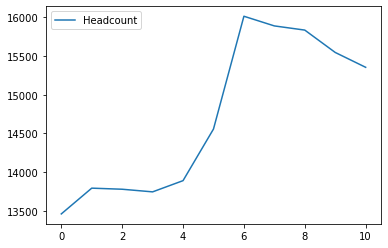

In [295]:
group_by_sex_year_index_reseted[group_by_sex_year_index_reseted.Sex=="F"].plot()

<AxesSubplot:>

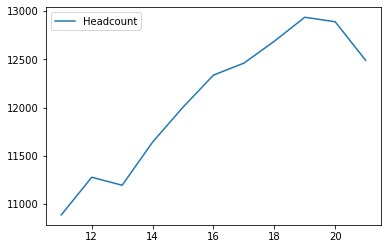

In [296]:
group_by_sex_year_index_reseted[group_by_sex_year_index_reseted.Sex=="M"].plot()

# EXERCISE: Groupby

You have 5 minutes to practice groupby


# Merging Data
- **Concatenation**: combining together Series, DataFrame
- **Joining**: join operations idiomatically very similar to relational databases like SQL

## Reading Excel Files
```
left = pd.read_excel('./data/Students.xlsx', sheet_name=0)
right = pd.read_excel('./data/Students.xlsx', sheet_name=1)
```

In [74]:
left = pd.read_excel('./data/Students.xlsx', sheet_name=0)
right = pd.read_excel('./data/Students.xlsx', sheet_name=1)

## Using `merge()` function
```
joined = pd.merge(left, right, on='AcademicYear')
joined
```

In [76]:
left.head()

,AcademicYear,AssociateDegree,HigherDiploma,Subdegree,FirstYearFirstDegree,TopUpDegree,Undergraduate
0,2007/08,12029,9882,21911,2468,1731,4199
1,2008/09,11238,9405,20643,3004,2095,5099
2,2009/10,14177,10186,24363,2782,2680,5462
3,2010/11,17646,10715,28361,3193,3334,6527
4,2011/12,16018,9331,25349,3640,4081,7721


In [78]:
joined = pd.merge(left, right, on='AcademicYear')
joined

,AcademicYear,AssociateDegree_x,HigherDiploma_x,Subdegree_x,FirstYearFirstDegree_x,TopUpDegree_x,Undergraduate_x,AssociateDegree_y,HigherDiploma_y,Subdegree_y,FirstYearFirstDegree_y,TopUpDegree_y,Undergraduate_y
0,2007/08,12029,9882,21911,2468,1731,4199,7159,6372,13531,1558,-,1558
1,2008/09,11238,9405,20643,3004,2095,5099,7211,7459,14670,2065,-,2065
2,2009/10,14177,10186,24363,2782,2680,5462,7303,8097,15400,2727,1499,4226
3,2010/11,17646,10715,28361,3193,3334,6527,8026,7167,15193,2921,2296,5217
4,2011/12,16018,9331,25349,3640,4081,7721,9468,7669,17137,2915,3003,5918
5,2012/13,18131,13486,31617,6796,6082,12878,10541,9271,19812,3040,4656,7696
6,2013/14,11715,9751,21466,6128,7349,13477,13035,13620,26655,3939,5767,9706
7,2014/15,10275,9483,19758,7194,10488,17682,9061,8387,17448,3286,7768,11054
8,2015/16,10942,8713,19655,6701,8736,15437,7962,7983,15945,5933,8279,14212
9,2016/17,11127,7884,19011,6153,7635,13788,8246,6986,15232,6060,7127,13187


## using `concat()` function

```
df1 = pd.read_excel('./data/Students.xlsx', sheet_name=0)
df2 = pd.read_excel('./data/Students.xlsx', sheet_name=0)
concatencate1 = pd.concat([df1, df2])
concatencate1
concatencate2 = pd.concat([df1, df2], axis=1)
concatencate2
```

In [80]:
df1 = pd.read_excel('./data/Students.xlsx', sheet_name=0)
df2 = pd.read_excel('./data/Students.xlsx', sheet_name=0)
concatencate1 = pd.concat([df1, df2])
concatencate1

,AcademicYear,AssociateDegree,HigherDiploma,Subdegree,FirstYearFirstDegree,TopUpDegree,Undergraduate
0,2007/08,12029,9882,21911,2468,1731,4199
1,2008/09,11238,9405,20643,3004,2095,5099
2,2009/10,14177,10186,24363,2782,2680,5462
3,2010/11,17646,10715,28361,3193,3334,6527
4,2011/12,16018,9331,25349,3640,4081,7721
5,2012/13,18131,13486,31617,6796,6082,12878
6,2013/14,11715,9751,21466,6128,7349,13477
7,2014/15,10275,9483,19758,7194,10488,17682
8,2015/16,10942,8713,19655,6701,8736,15437
9,2016/17,11127,7884,19011,6153,7635,13788


In [81]:
concatencate2 = pd.concat([df1, df2], axis=1)
concatencate2

,AcademicYear,AssociateDegree,HigherDiploma,Subdegree,FirstYearFirstDegree,TopUpDegree,Undergraduate,AcademicYear,AssociateDegree,HigherDiploma,Subdegree,FirstYearFirstDegree,TopUpDegree,Undergraduate
0,2007/08,12029,9882,21911,2468,1731,4199,2007/08,12029,9882,21911,2468,1731,4199
1,2008/09,11238,9405,20643,3004,2095,5099,2008/09,11238,9405,20643,3004,2095,5099
2,2009/10,14177,10186,24363,2782,2680,5462,2009/10,14177,10186,24363,2782,2680,5462
3,2010/11,17646,10715,28361,3193,3334,6527,2010/11,17646,10715,28361,3193,3334,6527
4,2011/12,16018,9331,25349,3640,4081,7721,2011/12,16018,9331,25349,3640,4081,7721
5,2012/13,18131,13486,31617,6796,6082,12878,2012/13,18131,13486,31617,6796,6082,12878
6,2013/14,11715,9751,21466,6128,7349,13477,2013/14,11715,9751,21466,6128,7349,13477
7,2014/15,10275,9483,19758,7194,10488,17682,2014/15,10275,9483,19758,7194,10488,17682
8,2015/16,10942,8713,19655,6701,8736,15437,2015/16,10942,8713,19655,6701,8736,15437
9,2016/17,11127,7884,19011,6153,7635,13788,2016/17,11127,7884,19011,6153,7635,13788


In [61]:
left = pd.read_excel('./data/Students.xls', sheet_name=0)
right = pd.read_excel('./data/Students.xls', sheet_name=1)
joined = pd.merge(left, right, on='Academic year')
joined

,Academic year,Associate Degree_x,Higher Diploma_x,Sub-degree_x,First year first degree_x,Top-up degree_x,Under-graduate_x,Associate Degree_y,Higher Diploma_y,Sub-degree_y,First year first degree_y,Top-up degree_y,Under-graduate_y
0,2007/08,12029,9882,21911,2468,1731,4199,7159,6372,13531,1558,-,1558
1,2008/09,11238,9405,20643,3004,2095,5099,7211,7459,14670,2065,-,2065
2,2009/10,14177,10186,24363,2782,2680,5462,7303,8097,15400,2727,1499,4226
3,2010/11,17646,10715,28361,3193,3334,6527,8026,7167,15193,2921,2296,5217
4,2011/12,16018,9331,25349,3640,4081,7721,9468,7669,17137,2915,3003,5918
5,2012/13,18131,13486,31617,6796,6082,12878,10541,9271,19812,3040,4656,7696
6,2013/14,11715,9751,21466,6128,7349,13477,13035,13620,26655,3939,5767,9706
7,2014/15,10275,9483,19758,7194,10488,17682,9061,8387,17448,3286,7768,11054
8,2015/16,10942,8713,19655,6701,8736,15437,7962,7983,15945,5933,8279,14212
9,2016/17,11127,7884,19011,6153,7635,13788,8246,6986,15232,6060,7127,13187


# Data Visualization

## Matplotlib Introduction
Matplotlib is a low level graph plotting library for python.

## Import `matplotlib`

Most of features that we will use belong to `pyplot` submodule.

The sub module is usually imported as `plt` alias.

```
import matplotlib.pyplot as plt
%matplotlib inline
```

In [289]:
import matplotlib.pyplot as plt
%matplotlib inline

## Simple Line Plot

**Syntax**:

Use `plot()` function to draw points.

By default, the `plot()` function draws a **line** from point to point.

It takes TWO parameter to make a point: 

* `x` is an array containing the points on the x-axis.

* `y` is an array containing the points on the y-axis.

```
plt.plot(x, y)
```

* `x`: a numpy array for x-axis
* `y`: a numpy array for y-axis

**`plot()` function generates line plot by default**:
```
n = np.arange(1,11) # a range of number from 1 to 10
plt.plot(n, n*2)
```



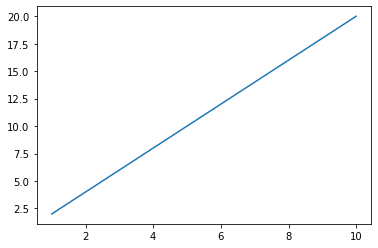

In [314]:
n = np.arange(1,11)
plt.plot(n, n*2)

## Plot Without Line (Markers Only)

Add a third parameter to specify the marker so as to plot without line. 

```
n = np.arange(1,11) # a range of number from 1 to 10
plt.plot(n, n*2, 'o') # the third parameter 'o' is the marker shape
```

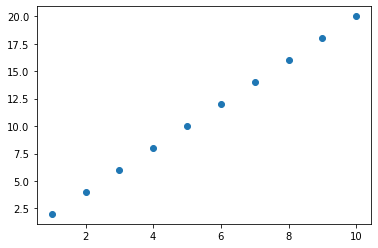

In [351]:
n = np.arange(1,11) # a range of number from 1 to 10
plt.plot(n, n*2, 'o')

## Other Marker Shapes

Other markers to consider:

`'o'`	Circle	
`'*'`	Star	
`'.'`	Point	
`','`	Pixel	
`'x'`	X	
`'X'`	X (filled)	
`'+'`	Plus	
`'P'`	Plus (filled)	
`'s'`	Square	
`'D'`	Diamond	
`'d'`	Diamond (thin)	
`'p'`	Pentagon	
`'H'`	Hexagon	
`'h'`	Hexagon	
`'v'`	Triangle Down	
`'^'`	Triangle Up	
`'<'`	Triangle Left	
`'>'`	Triangle Right	
`'1'`	Tri Down	
`'2'`	Tri Up	
`'3'`	Tri Left	
`'4'`	Tri Right	
`'|'`	Vline	
`'_'`	Hline

Examples:
```
n = np.arange(1,11) # a range of number from 1 to 10
plt.plot(n, n*2, 'D') # diamond marker
```

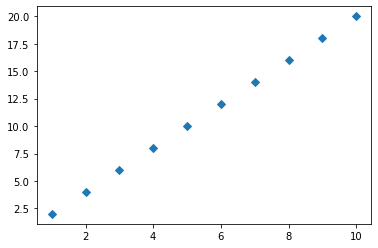

In [324]:
n = np.arange(1,11) # a range of number from 1 to 10
plt.plot(n, n*2, 'D')

## Plotting Both Line and Markers

Add a parameter name `marker` to your function to keep both line and markers.

**Examples**:
```
n = np.arange(1,11) # a range of number from 1 to 10
plt.plot(n, n*2, marker='D') # diamond marker
```

**Specifying Marker Size**:
```
n = np.arange(1,11) # a range of number from 1 to 10
plt.plot(n, n*2, marker='o', ms=10) # ms: marker size
```

**Specifying Marker Fill Color**:
```
n = np.arange(1,11) # a range of number from 1 to 10
plt.plot(n, n*2, marker='o', mfc='#FF00FF') # mfc: marker fill color
```

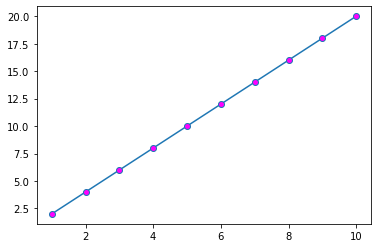

In [357]:
n = np.arange(1,11) # a range of number from 1 to 10
plt.plot(n, n*2, marker='o', mfc='#FF00FF') # mfc: marker fill color

## Line Styles

Add parameter `ls` to specify the line style

* `-`: solid line
* `:`: dotted line
* `--`: dashed line
* `-.`: dashdot line

Example:
```
n = np.arange(1,11) # a range of number from 1 to 10
plt.plot(n, n*2, ls=":") # ls: line style
```

Add `color` or `c` parameter to specify the line color
```
plt.plot(n, n*2, color="purple") # color: line color
```

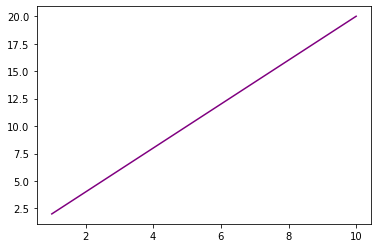

In [361]:
n = np.arange(1,11) # a range of number from 1 to 10
plt.plot(n, n*2, c="purple")

## Help with `plot()` function

Type
```
?plt.plot
```

or

```
help(plt.plot)
```

## Plot with Real Data

**import graduates data file**
```
graduates = pd.read_csv('./data/graduates.csv') 
```


**select subset of undergraduate in 'Business and Management' and male students only**
```
ug_bm_m = graduates[(graduates['LevelOfStudy']=='Undergraduate') 
                    & (graduates['ProgrammeCategory']=='Business and Management') 
                    & (graduates['Sex']=='M')]
ug_bm_m.head() # shows the rows previews
ug_bm_m.info() # show dataframe information
```


**Extact the required columns in the format of numpy array for x-axis and y-axis**
```
year = ug_bm_m['AcademicYear'] # extract `AcademicYear` column as `year` numpy array
headcount = ug_bm_m['Headcount'] # extract `Headcount` column as `headcount` numpy array

plt.plot(year, headcount) # year as x-axis and headcount as y-axis
plt.plot(headcount) # you can plot without providing x-axis. the index number/row number will be automatically used as values for x-axis
```

In [185]:
graduates = pd.read_csv('./data/graduates.csv')

In [301]:
ug_bm_m = graduates[(graduates['LevelOfStudy']=='Undergraduate') 
                    & (graduates['ProgrammeCategory']=='Business and Management') 
                    & (graduates['Sex']=='M')]
ug_bm_m.head()

,AcademicYear,LevelOfStudy,ProgrammeCategory,Sex,Headcount
16,2009/10,Undergraduate,Business and Management,M,1861
72,2010/11,Undergraduate,Business and Management,M,1900
128,2011/12,Undergraduate,Business and Management,M,1815
184,2012/13,Undergraduate,Business and Management,M,1826
240,2013/14,Undergraduate,Business and Management,M,1881


In [329]:
ug_bm_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 16 to 613
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AcademicYear       12 non-null     object
 1   LevelOfStudy       12 non-null     object
 2   ProgrammeCategory  12 non-null     object
 3   Sex                12 non-null     object
 4   Headcount          12 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 576.0+ bytes


In [330]:
year = ug_bm_m['AcademicYear']
headcount = ug_bm_m['Headcount']

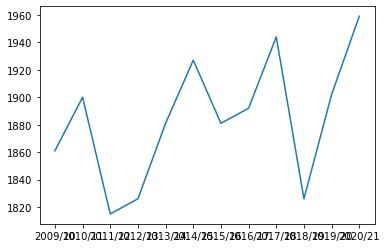

In [341]:
plt.plot(year, headcount)

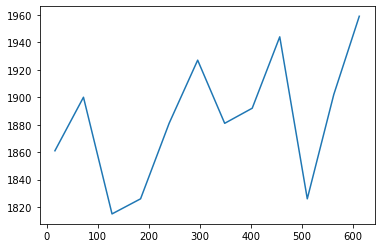

In [332]:
plt.plot(headcount)

## Rotating the xtickes

Call `xticks()` function to rotate the xticks.  It requires a rotation degree in as parameter.

Example:
```
plt.xticks(rotation=90)
plt.plot(year, headcount)
```

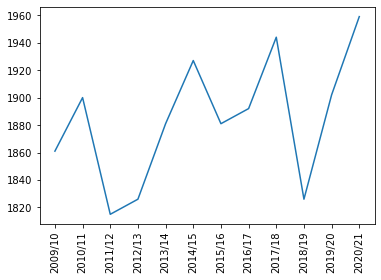

In [363]:
plt.xticks(rotation=90)
plt.plot(year, headcount)

## Setting Title

**Use `title()` function to add plot title**

Example:
```
plt.title('Undergraduate Students \n Business and Management')


plt.plot(year, headcount)
```

You can specify title location with `loc` paremeter
```
plt.title('Undergraduate Students \n Business and Management', loc="right")
plt.title('Undergraduate Students \n Business and Management', loc="left")

```

You can specify title font size with `fontsize` parameter
```
plt.title('Undergraduate Students \n Business and Management', fontsize=22) 
```

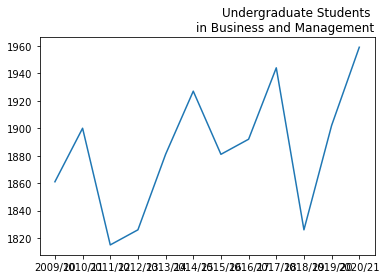

In [392]:
plt.title('Undergraduate Students \nin Business and Management', loc="right")
plt.plot(year, headcount)

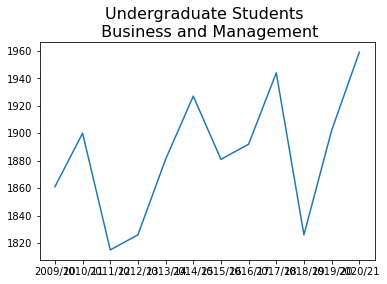

In [391]:
plt.title('Undergraduate Students \n Business and Management', fontsize=16)
plt.plot(year, headcount)

## Setting Axis Labels

**Use `xlabel()` and `ylabel()` to add axis labels**

Example:
```
plt.xlabel('Academic Year')
plt.ylabel('Student Headcount', fontsize=14)
plt.plot(year, headcount)
```

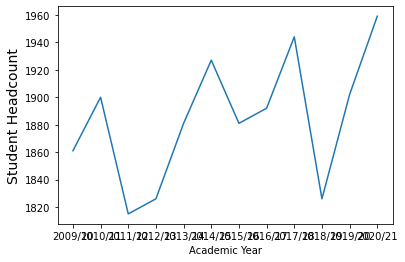

In [393]:
plt.xlabel('Academic Year')
plt.ylabel('Student Headcount', fontsize=14)
plt.plot(year, headcount)

## Plotting Multiple Lines

You can plot multiple line simply by adding more plot() function.

**Extracting Female undergraduate in 'Business and Management' for another plot**
```
ug_bm_f = graduates[(graduates['LevelOfStudy']=='Undergraduate') 
                    & (graduates['ProgrammeCategory']=='Business and Management') 
                    & (graduates['Sex']=='F')]
```

**Plotting multiple lines**
```
plt.plot(ug_bm_f['AcademicYear'], ug_bm_f['Headcount'])
plt.plot(ug_bm_m['AcademicYear'], ug_bm_m['Headcount'])
```

In [394]:
ug_bm_f = graduates[(graduates['LevelOfStudy']=='Undergraduate') 
                    & (graduates['ProgrammeCategory']=='Business and Management') 
                    & (graduates['Sex']=='F')]

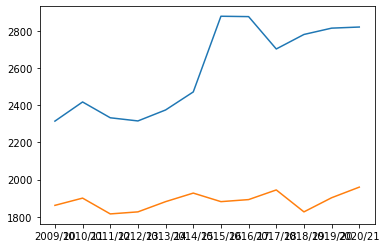

In [397]:
plt.plot(ug_bm_f['AcademicYear'], ug_bm_f['Headcount'])
plt.plot(ug_bm_m['AcademicYear'], ug_bm_m['Headcount'])

## Add Labels to Line and Show Legend


**Adding Labels and Color to Plots**
In the above plots, you can't tell which line is which. 

Let's add label and color to differentiate the lines
```
plt.plot(ug_bm_f['AcademicYear'], ug_bm_f['Headcount'], label = "Female", c="tomato")
plt.plot(ug_bm_m['AcademicYear'], ug_bm_m['Headcount'], label = "Male")
plt.legend() # call this function to show legend
```

You can change the location of legend if it's blocking your lines
```
plt.legend(loc="center right")
```

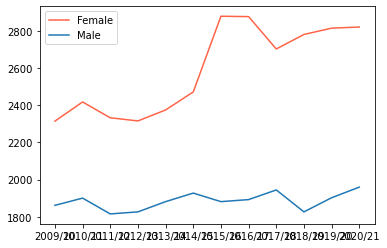

In [401]:
plt.plot(ug_bm_f['AcademicYear'], ug_bm_f['Headcount'], label = "Female", c="tomato")
plt.plot(ug_bm_m['AcademicYear'], ug_bm_m['Headcount'], label = "Male")
plt.legend()

## Configuring Grid Lines

**Call `grid()` function to configure grid line**

Example:
```
plt.plot(ug_bm_f['AcademicYear'], ug_bm_f['Headcount'], label = "Female", c="tomato")
plt.plot(ug_bm_m['AcademicYear'], ug_bm_m['Headcount'], label = "Male")

plt.grid() # shows both x and y axis grid lines

plt.grid(axis='y') # shows y-axis grid lines only

plt.grid(axis='x') # shows x-axis grid lines only

```

**Configuring `color` and `linewidth`**
```
plt.grid(c="purple", linewidth=0.1)
```


**Check help for more on configuring grid lines**
```
?plt.grid
help(plt.grid)
```


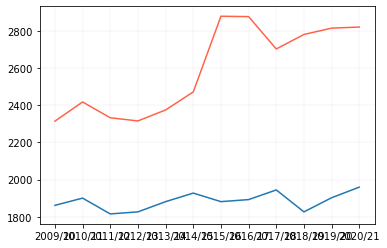

In [419]:
plt.plot(ug_bm_f['AcademicYear'], ug_bm_f['Headcount'], label = "Female", c="tomato")
plt.plot(ug_bm_m['AcademicYear'], ug_bm_m['Headcount'], label = "Male")
plt.grid(c="purple", linewidth=0.05)

In [411]:
?plt.grid

## Subplots

To draw multiple plots in one fiture, use `subplot()` function to specify the the number of `row`, `column` and the `position` of current plot.

**Example 1: 1 Row x 2 Columns**
```
plt.subplot(1,2,1) # the first two number are row and column while the last number is position
plt.plot(ug_bm_f['AcademicYear'], ug_bm_f['Headcount'], label = "Female", c="tomato")
plt.title("Female")

plt.subplot(1,2,2)
plt.plot(ug_bm_m['AcademicYear'], ug_bm_m['Headcount'], label = "Male")
plt.title("Male")
```

**Example 2: Two Rows x 1 Column**
```
plt.subplot(2,1,1)
plt.plot(ug_bm_f['AcademicYear'], ug_bm_f['Headcount'], label = "Female", c="tomato")
plt.title("Female")

plt.subplot(2,1,2)
plt.plot(ug_bm_m['AcademicYear'], ug_bm_m['Headcount'], label = "Male")
plt.title("Male")
```


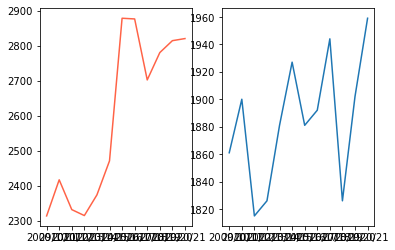

In [416]:
plt.subplot(1,2,1)
plt.plot(ug_bm_f['AcademicYear'], ug_bm_f['Headcount'], label = "Female", c="tomato")

plt.subplot(1,2,2)
plt.plot(ug_bm_m['AcademicYear'], ug_bm_m['Headcount'], label = "Male")

Text(0.5, 1.0, 'Male')

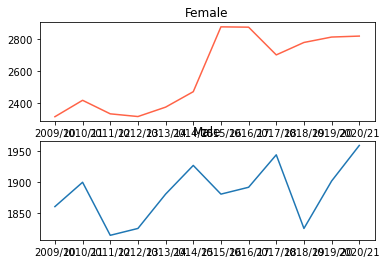

In [418]:
plt.subplot(2,1,1)
plt.plot(ug_bm_f['AcademicYear'], ug_bm_f['Headcount'], label = "Female", c="tomato")
plt.title("Female")

plt.subplot(2,1,2)
plt.plot(ug_bm_m['AcademicYear'], ug_bm_m['Headcount'], label = "Male")
plt.title("Male")

## Bar Plot



<BarContainer object of 12 artists>

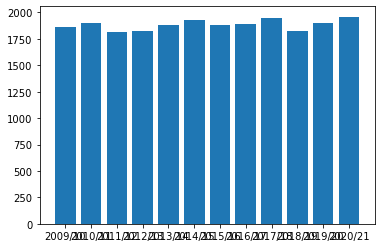

In [469]:
plt.bar(ug_bm_m['AcademicYear'], ug_bm_m['Headcount'])

<BarContainer object of 12 artists>

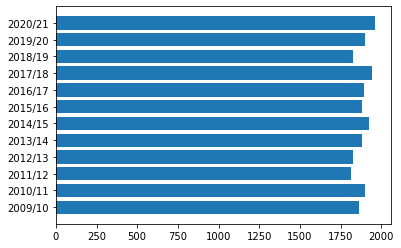

In [470]:
plt.barh(ug_bm_m['AcademicYear'], ug_bm_m['Headcount'])

## Histograms

A histogram is a graph showing frequency distributions.




In [473]:
# use NumPy to randomly generate an array with 250 values, 
# where the values will concentrate around 170, and the standard deviation is 10.
heights = np.random.normal(170, 10, 250)
print(heights)

[171.87735865 172.04015797 180.23623797 156.37549694 169.30813076
 168.26278021 158.98398272 186.79501579 147.21541999 169.43801536
 181.34822877 162.53109824 165.66541795 176.82564234 192.29879933
 162.57193933 181.17172677 179.5450877  196.98972886 184.42036772
 176.26967887 169.38916973 176.17219698 170.49219786 175.63126946
 150.18055891 168.25350053 168.80998153 175.22975573 166.37026476
 173.00663035 176.65268394 190.92671697 155.53559541 173.15927609
 162.51297317 173.05652428 173.43025005 166.49400752 176.26016568
 178.6760877  173.55076533 180.95216834 168.68412711 180.77406897
 178.22019292 171.96253344 167.75696573 168.4051207  168.52596088
 166.45010922 170.85063895 157.33443685 164.25773837 160.22754412
 161.03048367 171.01610503 157.07659839 182.84764384 173.43537293
 173.40953372 167.48376602 176.49177568 167.42900381 152.85416434
 169.86972559 189.08029528 163.02929361 176.79044305 165.52071771
 166.27076644 160.40798602 168.16733548 168.54430406 177.99367795
 166.06946

(array([ 3.,  5., 24., 39., 64., 42., 42., 17.,  8.,  6.]),
 array([143.38136484, 148.74220124, 154.10303764, 159.46387404,
        164.82471044, 170.18554685, 175.54638325, 180.90721965,
        186.26805605, 191.62889246, 196.98972886]),
 <BarContainer object of 10 artists>)

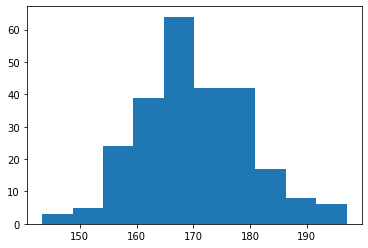

In [474]:
plt.hist(heights)

## Pie Chart

Pie Chart lets you emphasize the portion of whole.

**Use `unique()` function to show the distinct values of a column**
```
df['LevelOfStudy'].unique()
df['ProgrammeCategory'].unique()
```

**Exacting Rows**
```
engr_m_2021 = df[(df['ProgrammeCategory']=="Engineering and Technology") &
             (df['Sex']=='M') &
             (df['AcademicYear']=='2020/21')]

ug_m_2021 = df[(df['LevelOfStudy']=="Undergraduate") &
             (df['Sex']=='M') &
             (df['AcademicYear']=='2020/21')]
```


**Plotting Pie-chart with Labels**
```
plt.pie(engr_m_2021['Headcount'], labels=engr_m_2021['LevelOfStudy'])
plt.show()

plt.pie(ug_m_2021['Headcount'], labels=ug_m_2021['ProgrammeCategory'])
plt.show()
```


In [424]:
df

,AcademicYear,LevelOfStudy,ProgrammeCategory,Sex,Headcount
0,2009/10,Sub-degree,Arts and Humanities,M,158
1,2009/10,Sub-degree,Arts and Humanities,F,475
2,2009/10,Sub-degree,Business and Management,M,73
3,2009/10,Sub-degree,Business and Management,F,227
4,2009/10,Sub-degree,Education,M,122
...,...,...,...,...,...
648,2020/21,Research Postgraduate,"Medicine, Dentistry and Health",F,237
649,2020/21,Research Postgraduate,Sciences,M,554
650,2020/21,Research Postgraduate,Sciences,F,286
651,2020/21,Research Postgraduate,Social Sciences,M,114


In [432]:
df['ProgrammeCategory'].unique()

array(['Arts and Humanities', 'Business and Management', 'Education',
       'Engineering and Technology', 'Medicine, Dentistry and Health',
       'Sciences', 'Social Sciences'], dtype=object)

In [449]:
engr_m_2021 = df[(df['ProgrammeCategory']=="Engineering and Technology") &
             (df['Sex']=='M') &
             (df['AcademicYear']=='2020/21')]

ug_m_2021 = df[(df['LevelOfStudy']=="Undergraduate") &
             (df['Sex']=='M') &
             (df['AcademicYear']=='2020/21')]

In [460]:
engr_m_2021

,AcademicYear,LevelOfStudy,ProgrammeCategory,Sex,Headcount
617,2020/21,Undergraduate,Engineering and Technology,M,2829
645,2020/21,Research Postgraduate,Engineering and Technology,M,568
605,2020/21,Sub-degree,Engineering and Technology,M,331
631,2020/21,Taught Postgraduate,Engineering and Technology,M,76


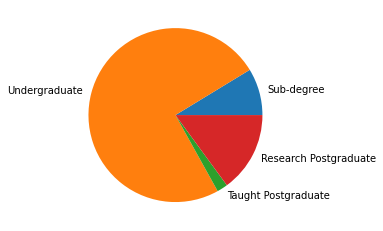

In [450]:
plt.pie(engr_m_2021['Headcount'], labels=engr_m_2021['LevelOfStudy'])
plt.show()

In [454]:
engr_m_2021

,AcademicYear,LevelOfStudy,ProgrammeCategory,Sex,Headcount
605,2020/21,Sub-degree,Engineering and Technology,M,331
617,2020/21,Undergraduate,Engineering and Technology,M,2829
631,2020/21,Taught Postgraduate,Engineering and Technology,M,76
645,2020/21,Research Postgraduate,Engineering and Technology,M,568


In [458]:
engr_m_2021_sorted = engr_m_2021.sort_values('Headcount', ascending=False)

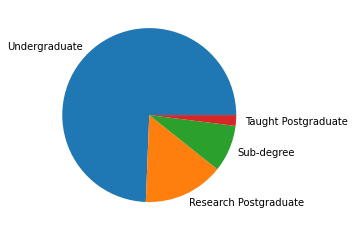

In [459]:
plt.pie(engr_m_2021_sorted['Headcount'], labels=engr_m_2021_sorted['LevelOfStudy'])
plt.show()

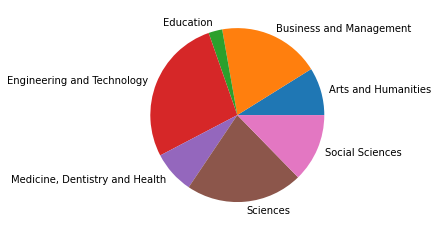

In [461]:
plt.pie(ug_m_2021['Headcount'], labels=ug_m_2021['ProgrammeCategory'])
plt.show()

In [451]:
ug_m_2021

,AcademicYear,LevelOfStudy,ProgrammeCategory,Sex,Headcount
611,2020/21,Undergraduate,Arts and Humanities,M,918
613,2020/21,Undergraduate,Business and Management,M,1959
615,2020/21,Undergraduate,Education,M,265
617,2020/21,Undergraduate,Engineering and Technology,M,2829
619,2020/21,Undergraduate,"Medicine, Dentistry and Health",M,817
621,2020/21,Undergraduate,Sciences,M,2251
623,2020/21,Undergraduate,Social Sciences,M,1314


## Saving Plots

Use `savefig()` function to save plots as external files.

```
plt.pie(ug_m_2021['Headcount'], labels=ug_m_2021['ProgrammeCategory'])
plt.savefig("./plots/pie.png")
plt.show()
```

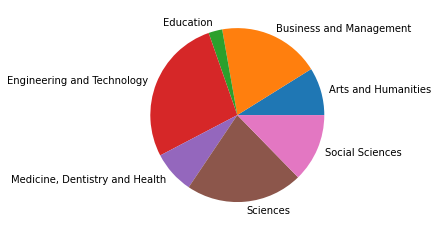

In [478]:
plt.pie(ug_m_2021['Headcount'], labels=ug_m_2021['ProgrammeCategory'])
plt.savefig("./plots/pie.png")
plt.show()

# EXERCISE : Data Visualization

<AxesSubplot:>

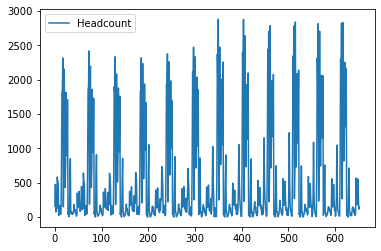

In [481]:
df.plot()

<AxesSubplot:xlabel='AcademicYear'>

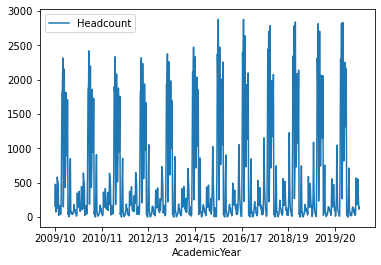

In [482]:
df.plot(x='AcademicYear', y='Headcount')